# Matplotlib Challenge Project - Roller Coaster

### Project Goals
You will work to create several data visualizations that will give you insight into the world of roller coasters.

Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wood = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")
steel = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")

In [3]:
print(wood.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


In [4]:
print(steel.head())

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo’s Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   

  Supplier  Year Built  Points  Year of Rank  
0  Intamin        2000    1204          2013  
1  Intamin        2000    1011          2013  
2  Intamin        2001     598          2013  
3      B&M        2001     596          2013  
4      B&M        1999     542          2013  


### Task 1

Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function

In [5]:
def plot_one_coaster(coaster_name, park_name, material):
    years = material["Year of Rank"].unique()
    coaster_ranking = material.Rank[(material.Name == coaster_name) & (material.Park == park_name)]
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    plt.plot(range(len(years)), coaster_ranking)
    ax.set_xticks(range(len(years)))
    ax.set_xticklabels(years)
    ax.set_yticks(range(min(coaster_ranking), max(coaster_ranking)+1))
    ax.invert_yaxis()
    plt.title("{} Rankings".format(coaster_name))
    plt.xlabel("Year")
    plt.ylabel("Ranking")
    plt.show()
    plt.clf()

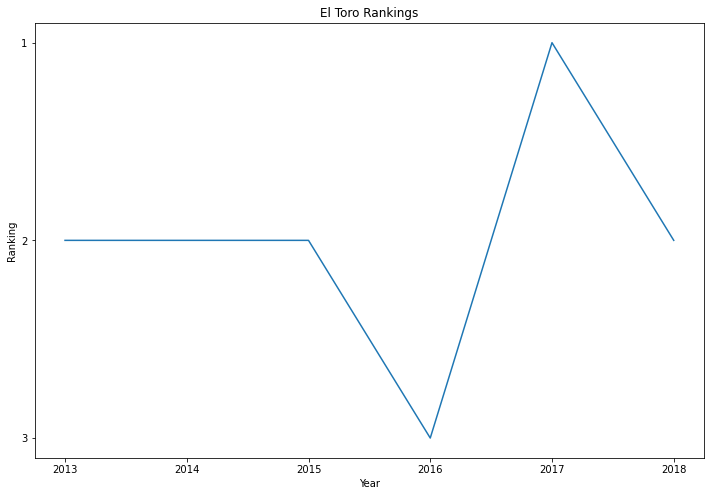

<Figure size 432x288 with 0 Axes>

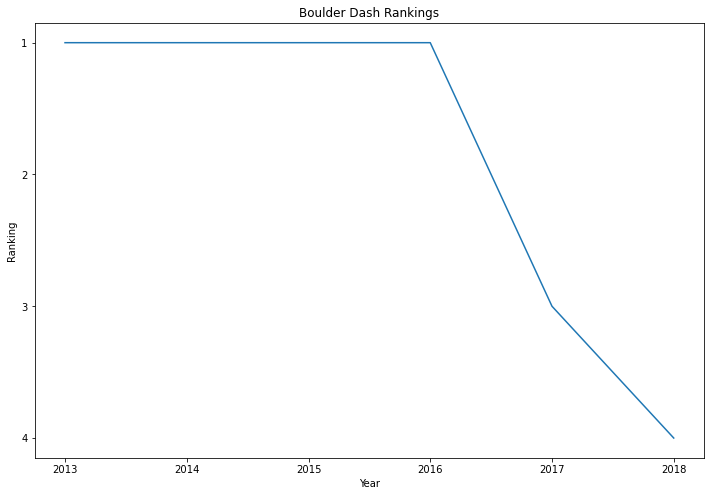

<Figure size 432x288 with 0 Axes>

In [6]:
plot_one_coaster("El Toro", "Six Flags Great Adventure", wood)
plot_one_coaster("Boulder Dash", "Lake Compounce", wood)

### Task 2

Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with `"El Toro"` as one roller coaster name, `“Boulder Dash“` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

In [7]:
def plot_two_coasters(coaster_one_name, coaster_one_park_name, coaster_two_name, coaster_two_park_name, material):
    years = material["Year of Rank"].unique()
    coaster_one_ranking = material.Rank[(material.Name == coaster_one_name) & (material.Park == coaster_one_park_name)]
    coaster_two_ranking = material.Rank[(material.Name == coaster_two_name) & (material.Park == coaster_two_park_name)]
    
    y_min = 0
    y_max = 0
    
    if min(coaster_one_ranking) <= min(coaster_two_ranking):
        y_min = min(coaster_one_ranking)
    else:
        y_min = min(coaster_two_ranking)
        
    if max(coaster_one_ranking) >= max(coaster_two_ranking):
        y_max = max(coaster_one_ranking) + 1
    else:
        y_max = max(coaster_two_ranking) + 1
    
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    plt.plot(range(len(years)), coaster_one_ranking, color="green", label=coaster_one_name)
    plt.plot(range(len(years)), coaster_two_ranking, color="purple", label=coaster_two_name)
    ax.set_xticks(range(len(years)))
    ax.set_xticklabels(years)
    ax.set_yticks(range(y_min, y_max))
    ax.invert_yaxis()
    plt.title("{} vs {} Rankings".format(coaster_one_name, coaster_two_name))
    plt.xlabel("Year")
    plt.ylabel("Ranking")
    plt.legend()
    plt.show()
    plt.clf()

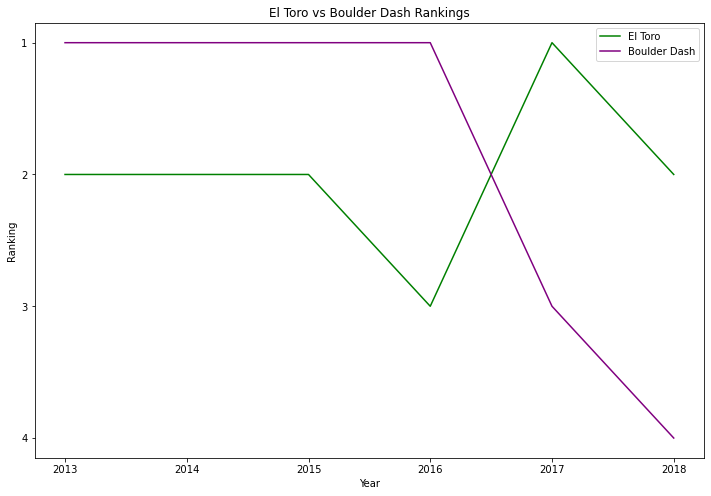

<Figure size 432x288 with 0 Axes>

In [8]:
plot_two_coasters("El Toro", "Six Flags Great Adventure", "Boulder Dash", "Lake Compounce", wood)

### Task 3

Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.

Call your function with a value for `n` and either the wood ranking or steel ranking DataFrame.

In [9]:
def plot_top_n_coasters(n, material):
    years = material["Year of Rank"].unique()
    top_n_ranking = material[material.Rank <= n]
    
    plt.figure(figsize=(15,10))
    ax = plt.subplot()
    
    for coaster in set(top_n_ranking["Name"]):
        coaster_ranking = top_n_ranking[top_n_ranking["Name"] == coaster]
        plt.plot(coaster_ranking['Year of Rank'], coaster_ranking['Rank'], label=coaster)
                
    ax.set_yticks(range(1, n+1))
    ax.invert_yaxis()
    plt.title("Top {} Rankings".format(str(n)))
    plt.xlabel("Year")
    plt.ylabel("Ranking")
    plt.legend(loc=4)
    plt.show()
    plt.clf()

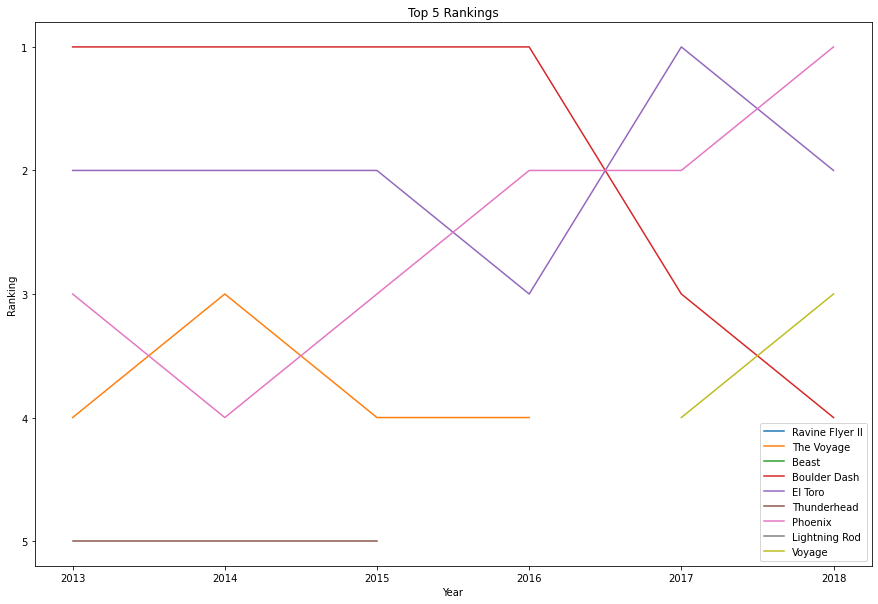

<Figure size 432x288 with 0 Axes>

In [10]:
plot_top_n_coasters(5, wood)

### Task 4

Now that you’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. Captain Coaster is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [11]:
coasters = pd.read_csv("roller_coasters.csv")
print(coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


### Task 5

Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and one of the column names.

In [12]:
def coaster_hist(df, col):
    plt.figure(figsize=(12,8))
    if col == "height":
        heights = df[df['height'] <= 140]['height'].dropna()
        plt.hist(heights, color="#03a9fc", edgecolor="#0482bf")
    else:
        plt.hist(df[col].dropna(), range=(min(df[col]), max(df[col])), bins=10, color="#03a9fc", edgecolor="#0482bf")
    plt.title("Histogram of Roller Coaster {}".format(col))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    plt.clf()

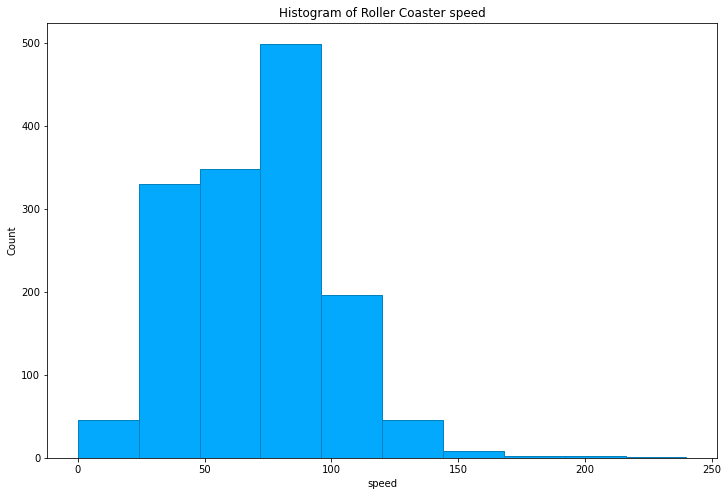

<Figure size 432x288 with 0 Axes>

In [13]:
coaster_hist(coasters, "speed")

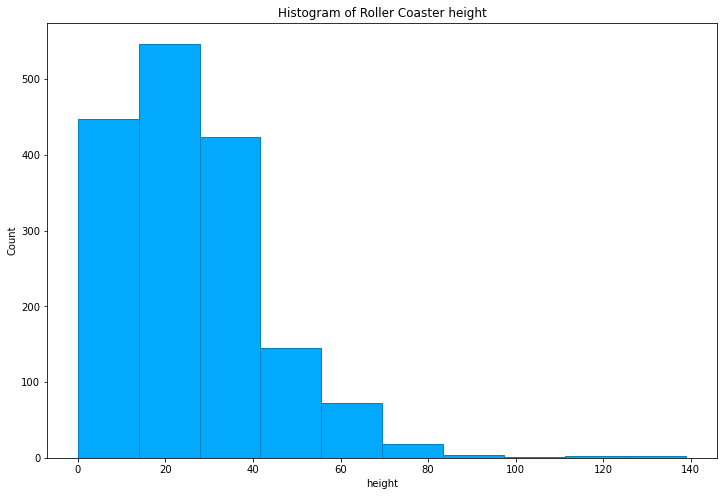

<Figure size 432x288 with 0 Axes>

In [14]:
coaster_hist(coasters, "height")

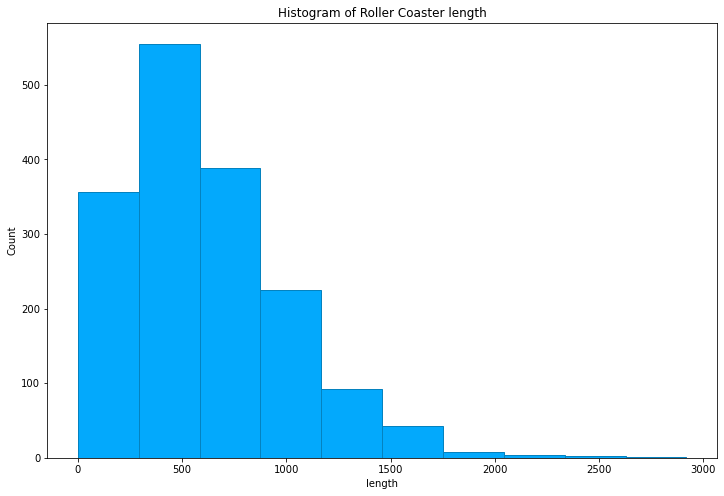

<Figure size 432x288 with 0 Axes>

In [15]:
coaster_hist(coasters, "length")

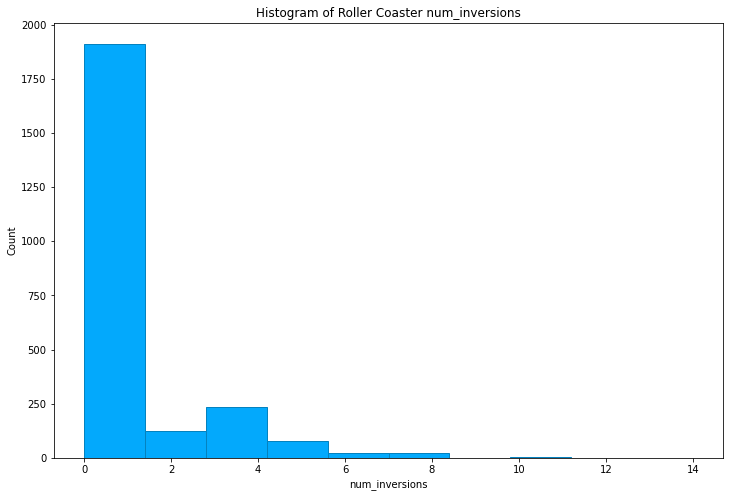

<Figure size 432x288 with 0 Axes>

In [16]:
coaster_hist(coasters, "num_inversions")

### Task 6

Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and an amusement park name.

In [17]:
def num_inversion_bar(df, park_name):
    park_coasters = df[df["park"] == park_name]
    park_coasters = park_coasters.sort_values("num_inversions", ascending=False)
    coaster_names = park_coasters["name"]
    number_inversions = park_coasters["num_inversions"]
    plt.figure(figsize=(12,8))
    plt.bar(range(len(number_inversions)), number_inversions, color="#03a9fc", edgecolor="#0482bf")
    ax = plt.subplot()
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names, rotation=90)
    plt.title("Number of Inversion Per Coaster at {}".format(park_name))
    plt.xlabel("Coaster Name")
    plt.ylabel("Number of Inversions")
    plt.show()
    plt.clf()

<ipython-input-17-1cde635763b4>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


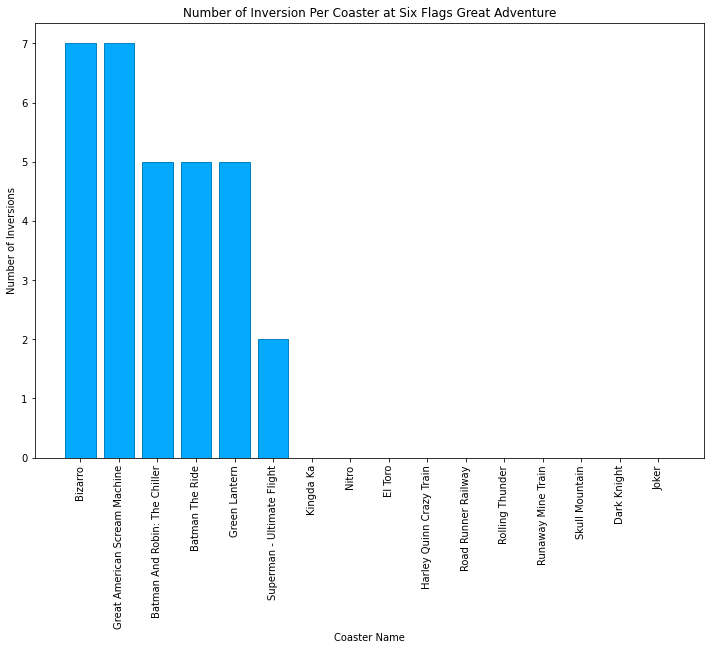

<Figure size 432x288 with 0 Axes>

In [18]:
num_inversion_bar(coasters, "Six Flags Great Adventure")

### Task 7

Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame.

In [19]:
def pie_status(df):
    operating = df[df["status"] == "status.operating"]
    closed = df[df["status"] == "status.closed.definitely"]
    num_operating = len(operating)
    num_closed = len(closed)
    status_count = [num_operating, num_closed]
    plt.pie(status_count, autopct="%0.1f%%", labels=["Operating", "Closed"], colors=["#1db309", "#e04c12"])
    plt.axis("equal")
    plt.show()

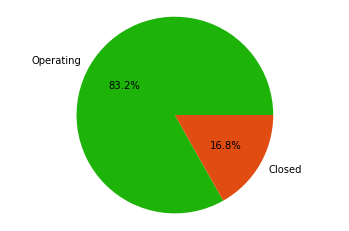

In [20]:
pie_status(coasters)

### Task 8

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and two-column names.

In [21]:
def coaster_scatter(df, col1, col2):
    if col1 == "height":
        df = df[df['height'] < 140]
    if col2 == "height":
        df = df[df['height'] < 140]

    plt.scatter(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Scatter Plot of {} vs {}".format(col1, col2))
    plt.show

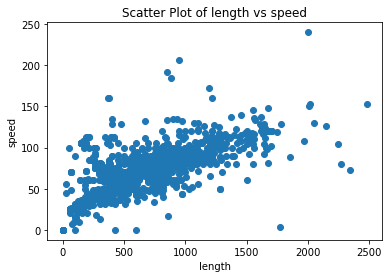

In [22]:
coaster_scatter(coasters, "length", "speed")

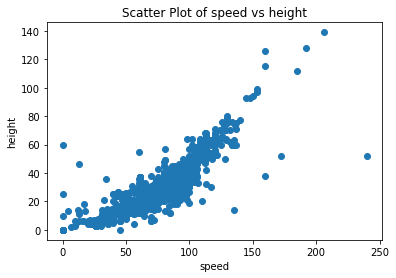

In [23]:
coaster_scatter(coasters, "speed", "height")